# Dataset


https://www.kaggle.com/datasets/researcher1548/livestock-symptoms-and-diseases

# Import libraries and load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/T2320049_SUMMER_2304/FINAL-DEFENSE/demo8.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease,Symptom 4
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia,painful mouth
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus,blood in nature
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus,dark urine
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg,dark urine
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia,immunosuppression
5,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth,painful mouth
6,sheep,6,103.3,loss of appetite,depression,painless lumps,lumpy virus,painful mouth
7,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth,dark urine
8,buffalo,9,102.5,depression,painless lumps,loss of appetite,lumpy virus,blood in nature
9,goat,3,102.7,lameness,blisters on mouth,loss of appetite,foot and mouth,dark urine


In [ ]:
pneumonia = (data['Disease']=='pneumonia').sum()
blackleg = (data['Disease']=='blackleg').sum()
fm = (data['Disease']=='foot and mouth').sum()
anthrax = (data['Disease']=='anthrax').sum()
lmv = (data['Disease']=='lumpy virus').sum()
print(pneumonia)
print(blackleg)
print(fm)
print(anthrax)
print(lmv)

7330
9713
9701
9842
7192


# EDA

In [ ]:
data.shape

(43778, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
 7   Symptom 4    43778 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.7+ MB


In [ ]:
data.describe()

,Age,Temperature
count,43778.000000,43778.000000
mean,6.769131,102.269590
std,3.886739,1.400872
min,1.000000,100.000000
25%,4.000000,101.100000
50%,7.000000,102.200000
75%,10.000000,103.400000
max,15.000000,105.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,43778.0,6.769131,3.886739,1.0,4.0,7.0,10.0,15.0
Temperature,43778.0,102.269590,1.400872,100.0,101.1,102.2,103.4,105.0


In [ ]:
all_animals = data['Animal'].unique()
print(f'{all_animals} \n number of animals = {len(all_animals)}')

['cow' 'buffalo' 'sheep' 'goat'] 
 number of animals = 4


In [ ]:
all_disease = data['Disease'].unique()
print(f'{all_disease}\n number of diseases = {len(all_disease)}')

['pneumonia' 'lumpy virus' 'blackleg' 'foot and mouth' 'anthrax']
 number of diseases = 5


In [ ]:
#Unique Symptoms
def unique_symptoms():
    symptom_features = ['Symptom 1','Symptom 2','Symptom 3']
    for i in symptom_features:
        symptoms = data[i].unique()
        print(f' {i} = {np.sort(symptoms)}\n\n Total = {len(symptoms)} \n')


unique_symptoms()

def are_symptoms_same():
    Symptop_1 = np.sort(data['Symptom 1'].unique())
    Symptop_2 = np.sort(data['Symptom 2'].unique())
    Symptop_3 = np.sort(data['Symptom 3'].unique())
    print("Are equal?")
    return np.array_equal(Symptop_1,Symptop_2) and np.array_equal(Symptop_1,Symptop_3)

are_symptoms_same()

 Symptom 1 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'blisters on tongue' 'chest discomfort' 'chills' 'crackling sound'
 'depression' 'difficulty walking' 'fatigue' 'lameness' 'loss of appetite'
 'painless lumps' 'shortness of breath' 'sores on gums' 'sores on hooves'
 'sores on mouth' 'sores on tongue' 'sweats' 'swelling in abdomen'
 'swelling in extremities' 'swelling in limb' 'swelling in muscle'
 'swelling in neck']

 Total = 24 

 Symptom 2 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'blisters on tongue' 'chest discomfort' 'chills' 'crackling sound'
 'depression' 'difficulty walking' 'fatigue' 'lameness' 'loss of appetite'
 'painless lumps' 'shortness of breath' 'sores on gums' 'sores on hooves'
 'sores on mouth' 'sores on tongue' 'sweats' 'swelling in abdomen'
 'swelling in extremities' 'swelling in limb' 'swelling in muscle'
 'swelling in neck']

 Total = 24 

 Symptom 3 = ['blisters on gums' 'blisters on hooves' 'blisters on mouth'
 'bl

True

# Preprocessing

In [ ]:
# Preprocessing
label_encoders = {}
for column in ['Animal', 'Temperature','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4','Disease']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])





# Splitting the dataset into features and target variable
X = data[['Animal', 'Age', 'Temperature','Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4']]  # Features
y = data['Disease']  # Target variable

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(30644, 7)
(13134, 7)
(30644,)
(13134,)


In [ ]:
data.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease,Symptom 4
0,1,3,31,7,12,11,4,5
1,0,13,45,12,11,7,3,0
2,3,1,5,7,12,11,3,2
3,1,14,3,11,21,6,1,2
4,3,2,36,12,11,7,4,4


# Data Visualization

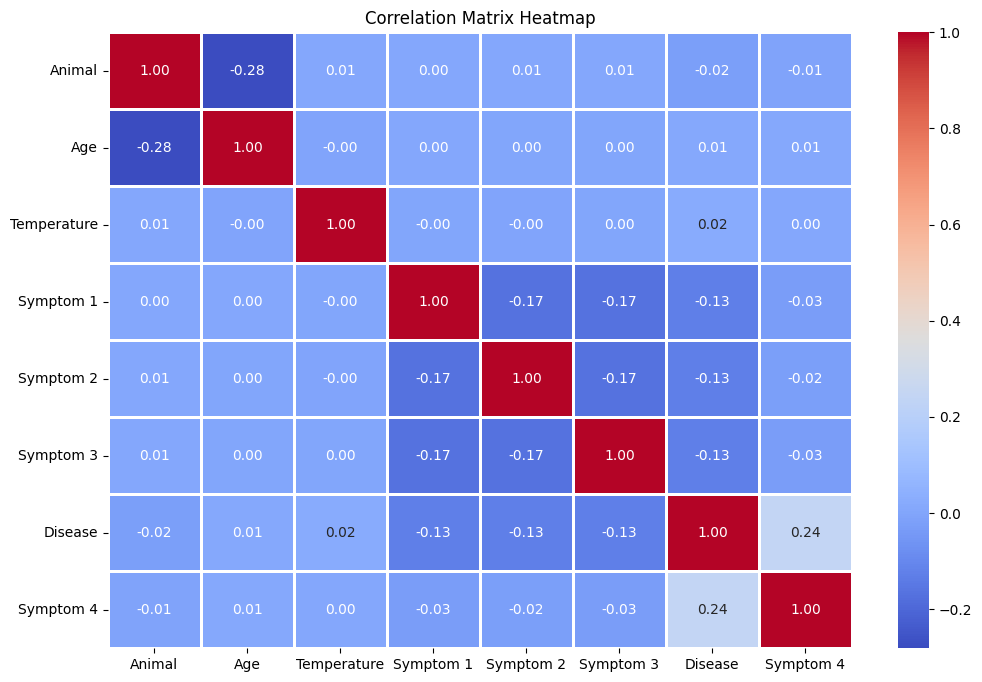

In [ ]:
# Calculating the correlation matrix
corr_matrix1 = data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Basic Models

**NEURAL NETWORK**

Epoch 1/20
958/958 [==============================] - 4s 3ms/step - loss: 1.3246 - accuracy: 0.4386 - val_loss: 0.9906 - val_accuracy: 0.6021
Epoch 2/20
958/958 [==============================] - 3s 3ms/step - loss: 0.8898 - accuracy: 0.6201 - val_loss: 0.7791 - val_accuracy: 0.7075
Epoch 3/20
958/958 [==============================] - 3s 4ms/step - loss: 0.7217 - accuracy: 0.7027 - val_loss: 0.6726 - val_accuracy: 0.7460
Epoch 4/20
958/958 [==============================] - 2s 2ms/step - loss: 0.6149 - accuracy: 0.7526 - val_loss: 0.5855 - val_accuracy: 0.7750
Epoch 5/20
958/958 [==============================] - 2s 3ms/step - loss: 0.5298 - accuracy: 0.7915 - val_loss: 0.4726 - val_accuracy: 0.8160
Epoch 6/20
958/958 [==============================] - 2s 2ms/step - loss: 0.4567 - accuracy: 0.8225 - val_loss: 0.4429 - val_accuracy: 0.8273
Epoch 7/20
958/958 [==============================] - 2s 2ms/step - loss: 0.4003 - accuracy: 0.8410 - val_loss: 0.3777 - val_accuracy: 0.8569
Epoch 

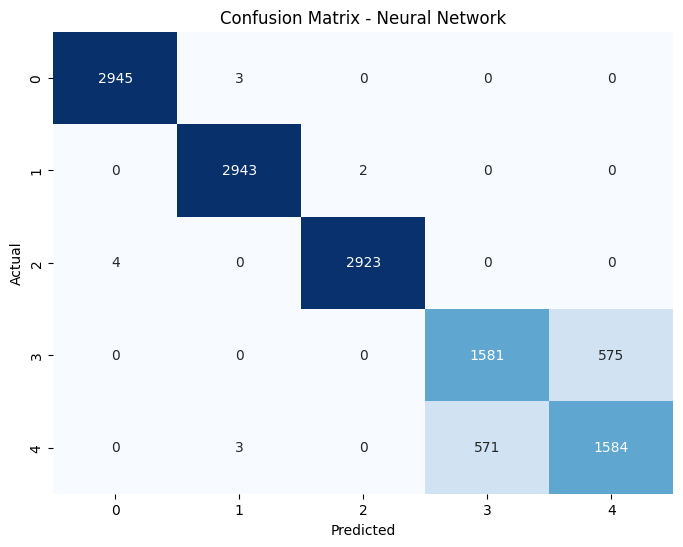

Neural Network Accuracy: 0.9118318867062586
Neural Network Precision: 0.9117719747172144
Neural Network Recall: 0.9118318867062586
Neural Network F1 Score: 0.911801684784319




In [ ]:
# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_data=(X_test, y_test_one_hot))

# Predict using the trained model
y_pred_nn = np.argmax(model.predict(X_test), axis=-1)

# Displaying the confusion matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()

# Calculating and displaying precision, recall, and F1 score for Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

print(f"Neural Network Accuracy: {accuracy_nn}")
print(f"Neural Network Precision: {precision_nn}")
print(f"Neural Network Recall: {recall_nn}")
print(f"Neural Network F1 Score: {f1_nn}")
print("\n")


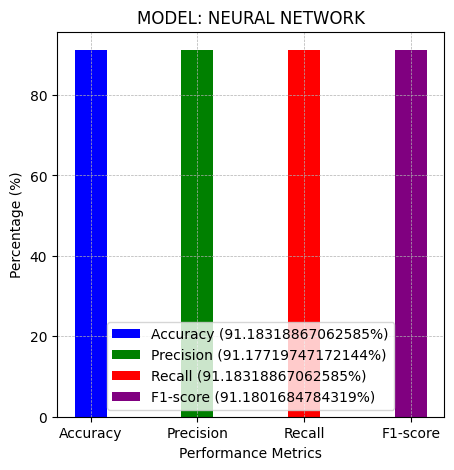

In [ ]:


# Model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy_nn * 100, precision_nn * 100, recall_nn * 100, f1_nn * 100]

# Colors for each bar
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(5, 5))
bar_width = 0.3  # Width of the bars

# Create bars
for i, (metric, value, color) in enumerate(zip(metrics, values, colors)):
    plt.bar(i, value, width=bar_width, color=color, label=f'{metric} ({value}%)')

# Add xticks on the middle of the group bars
plt.xticks(range(len(metrics)), metrics)

plt.title('MODEL: NEURAL NETWORK')
plt.xlabel('Performance Metrics')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



**KNN**

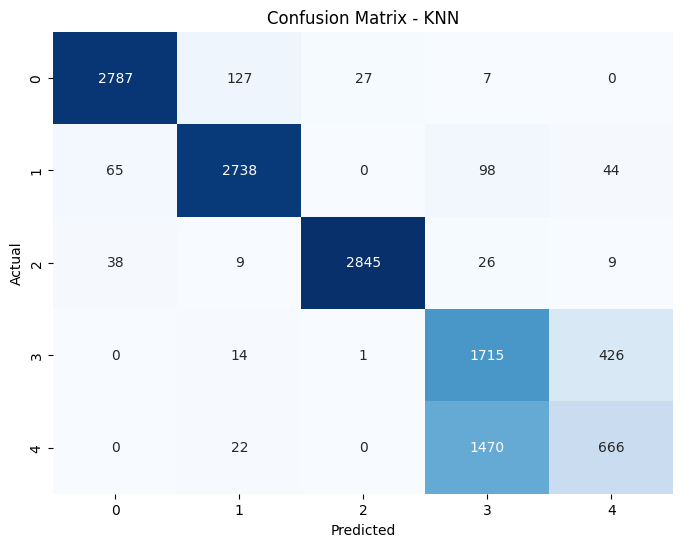

KNN Accuracy: 0.8185625095172834
KNN Precision: 0.8285837626487618
KNN Recall: 0.8185625095172834
KNN F1 Score: 0.8118044708240222




In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Displaying the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Calculating and displaying precision, recall, and F1 score for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}")
print("\n")

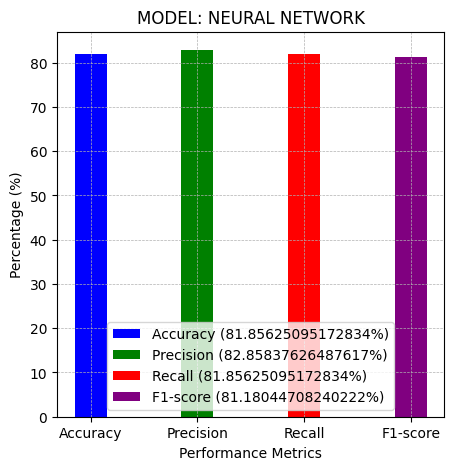

In [ ]:
# Model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy_knn * 100, precision_knn * 100, recall_knn * 100, f1_knn * 100]

# Colors for each bar
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(5, 5))
bar_width = 0.3  # Width of the bars

# Create bars
for i, (metric, value, color) in enumerate(zip(metrics, values, colors)):
    plt.bar(i, value, width=bar_width, color=color, label=f'{metric} ({value}%)')

# Add xticks on the middle of the group bars
plt.xticks(range(len(metrics)), metrics)

plt.title('MODEL: NEURAL NETWORK')
plt.xlabel('Performance Metrics')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

**XGBOOST**

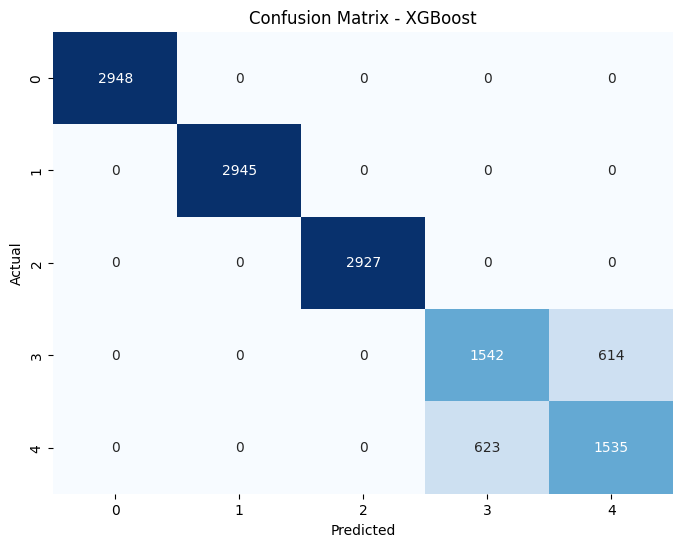

XGBoost Accuracy: 0.9058169636059084
XGBoost Precision: 0.9058183652935705
XGBoost Recall: 0.9058169636059084
XGBoost F1 Score: 0.9058166447796377




In [ ]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Displaying the confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Calculating and displaying precision, recall, and F1 score for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")
print("\n")

**ADABOOST CLASSIFIER**

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier


# # Creating the AdaBoost model and fitting it
# ada_classifier = AdaBoostClassifier()
# ada_classifier.fit(X_train, y_train)
# y_pred_ada = ada_classifier.predict(X_test)

# # Displaying the confusion matrix for AdaBoost
# conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - AdaBoost")
# plt.show()

# # Calculating and displaying precision, recall, and F1 score for AdaBoost
# accuracy_ada = accuracy_score(y_test, y_pred_ada)
# precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
# recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
# f1_ada = f1_score(y_test, y_pred_ada, average='weighted')

# print(f"AdaBoost Accuracy: {accuracy_ada}")
# print(f"AdaBoost Precision: {precision_ada}")
# print(f"AdaBoost Recall: {recall_ada}")
# print(f"AdaBoost F1 Score: {f1_ada}")
# print("\n")


**GRADIENT BOOSTING CLASSIFIER**

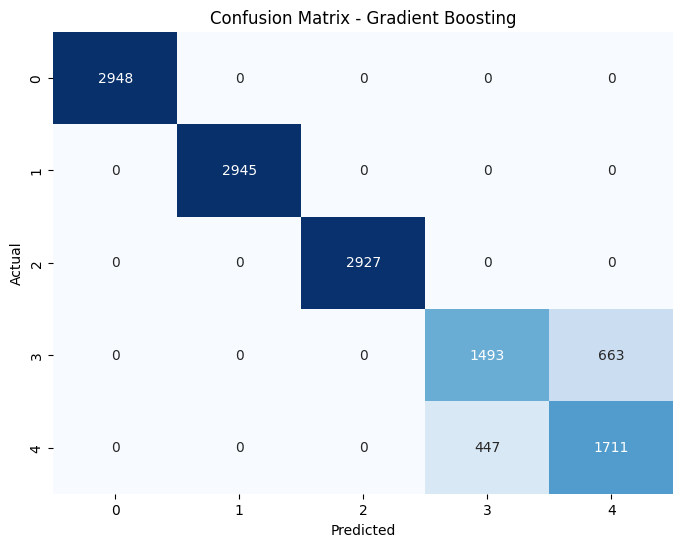

Gradient Boosting Accuracy: 0.9154865235267245
Gradient Boosting Precision: 0.9162901197250328
Gradient Boosting Recall: 0.9154865235267245
Gradient Boosting F1 Score: 0.9152721424921536


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Creating the Gradient Boosting model and fitting it
gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train, y_train)
y_pred_gbm = gbm_classifier.predict(X_test)

# Displaying the confusion matrix for Gradient Boosting
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

# Calculating and displaying precision, recall, and F1 score for Gradient Boosting
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

print(f"Gradient Boosting Accuracy: {accuracy_gbm}")
print(f"Gradient Boosting Precision: {precision_gbm}")
print(f"Gradient Boosting Recall: {recall_gbm}")
print(f"Gradient Boosting F1 Score: {f1_gbm}")


**DECISION** **TREE**

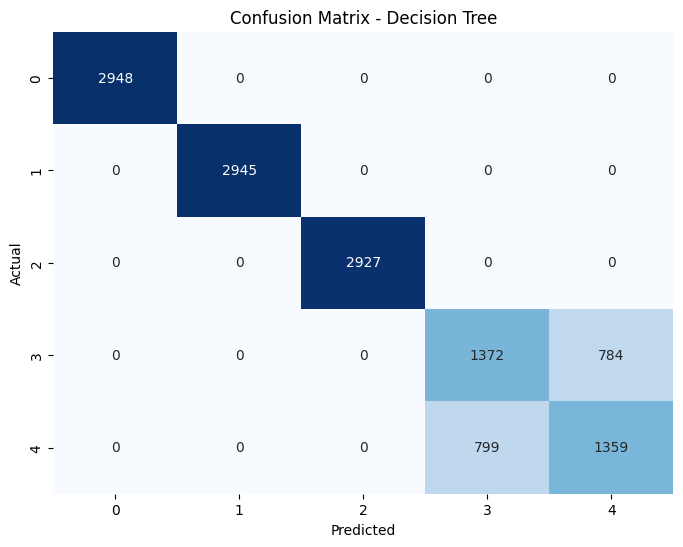

Decision Tree Accuracy: 0.8185625095172834
Decision Tree Precision: 0.8794756253471054
Decision Tree Recall: 0.8794731231917161
Decision Tree F1 Score: 0.8794718603114513




In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

# Displaying the confusion matrix for Decision Tree
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Calculating and displaying precision, recall, and F1 score for Decision Tree
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree, average='weighted')
recall_dtree = recall_score(y_test, y_pred_dtree, average='weighted')
f1_dtree = f1_score(y_test, y_pred_dtree, average='weighted')

print(f"Decision Tree Accuracy: {accuracy_knn}")
print(f"Decision Tree Precision: {precision_dtree}")
print(f"Decision Tree Recall: {recall_dtree}")
print(f"Decision Tree F1 Score: {f1_dtree}")
print("\n")

**RANDOM FOREST**

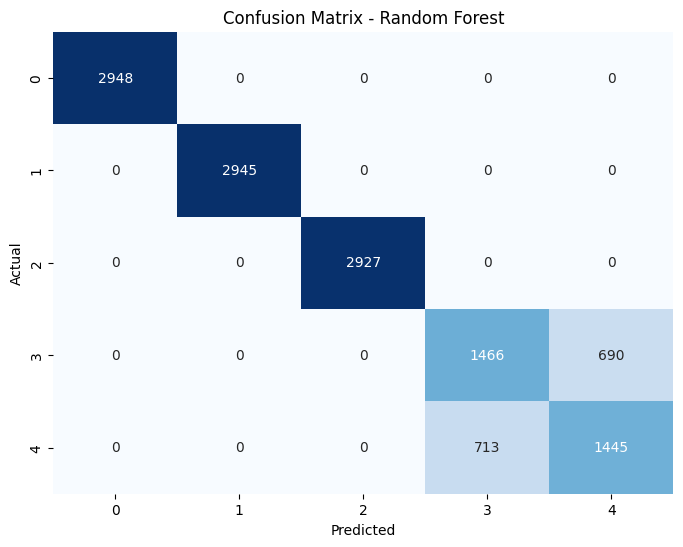

Random Forest Accuracy: 0.8931780112684635
Random Forest Precision: 0.8931850673104962
Random Forest Recall: 0.8931780112684635
Random Forest F1 Score: 0.8931752388562749




In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Displaying the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Calculating and displaying precision, recall, and F1 score for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")
print("\n")

**SVM**

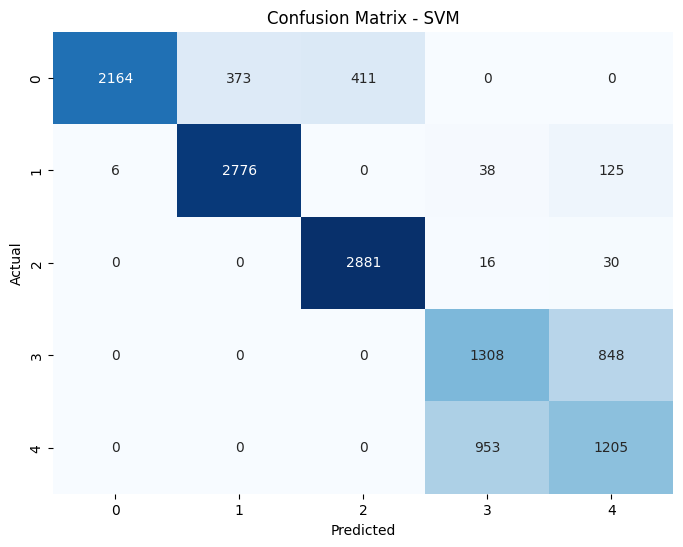

SVM Accuracy: 0.7868128521394853
SVM Precision: 0.7989537397062404
SVM Recall: 0.7868128521394853
SVM F1 Score: 0.787317060122473




In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Displaying the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Calculating and displaying precision, recall, and F1 score for SVM
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Calculating the accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")
print("\n")

**NAIVE BAYES**

In [ ]:
# # Naive Bayes Classifier
# nb_classifier = GaussianNB()
# nb_classifier.fit(X_train, y_train)
# y_pred_nb = nb_classifier.predict(X_test)

# # Displaying the confusion matrix for Naive Bayes
# conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Naive Bayes")
# plt.show()

# # Calculating and displaying precision, recall, and F1 score for Naive Bayes
# precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
# recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
# f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# # Calculating the accuracy for Naive Bayes
# accuracy_nb = accuracy_score(y_test, y_pred_nb)

# print(f"Naive Bayes Accuracy: {accuracy_nb}")
# print(f"Naive Bayes Precision: {precision_nb}")
# print(f"Naive Bayes Recall: {recall_nb}")
# print(f"Naive Bayes F1 Score: {f1_nb}")

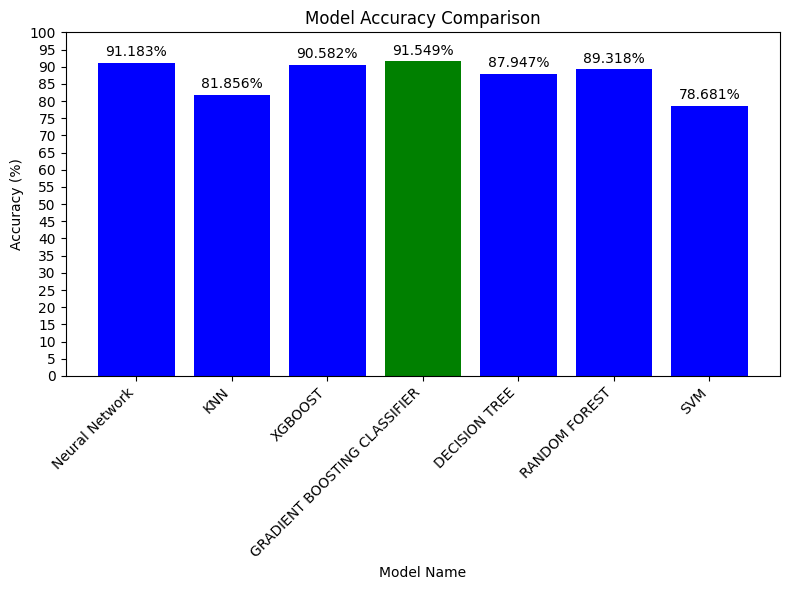

In [ ]:
import matplotlib.pyplot as plt

# Data
model_names = ["Neural Network", "KNN", "XGBOOST", "GRADIENT BOOSTING CLASSIFIER",
               "DECISION TREE", "RANDOM FOREST", "SVM"]
accuracies = [accuracy_nn,  accuracy_knn, accuracy_xgb, accuracy_gbm, accuracy_dtree, accuracy_rf, accuracy_svm]
accuracies_percentage = [x * 100 for x in accuracies]
max_accuracy = max(accuracies_percentage)  # Find the maximum accuracy value
colors = ['green' if acc == max_accuracy else 'blue' for acc in accuracies_percentage]  # Color the highest bar red

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracies_percentage, color=colors)
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha="right")
plt.yticks(range(0, 101, 5))
plt.ylim(0, 100)

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.3f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()



# Ensemble Models

**ENSEMBLE**

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report


# # Split data into train, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.50, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# # Initialize individual models
# models = {
#     "random_forest": RandomForestClassifier(n_estimators=100),
#     "knn": KNeighborsClassifier(),
#     "svm": SVC(probability=True),
#     "decision_tree": DecisionTreeClassifier(),
#     "naive_bayes": GaussianNB(),
#     "xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "mlp": MLPClassifier()
# }

# # Train each model and store predictions for validation set
# validation_predictions = []
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict_proba(X_val)[:, 1]
#     validation_predictions.append(preds)
#     print(f"{name} trained.")

# # Convert list of predictions into a matrix
# validation_predictions = np.column_stack(validation_predictions)

# # Train the meta-model on the validation predictions
# meta_model = LogisticRegression()
# meta_model.fit(validation_predictions, y_val)

# # Predict on test set using trained individual models
# test_predictions = []
# for model in models.values():
#     preds = model.predict_proba(X_test)[:, 1]
#     test_predictions.append(preds)
# test_predictions = np.column_stack(test_predictions)

# # Use meta-model to make final predictions on test set
# final_predictions = meta_model.predict(test_predictions)

# # Evaluate the ensemble model
# print("Accuracy:", accuracy_score(y_test, final_predictions))
# print(classification_report(y_test, final_predictions))


In [ ]:

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report



# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Initialize individual classifiers
# clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
# clf2 = KNeighborsClassifier()
# clf3 = SVC(probability=True, random_state=42)
# clf4 = DecisionTreeClassifier(random_state=42)
# clf5 = GaussianNB()
# clf6 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# clf7 = MLPClassifier(random_state=42)

# # Create a voting classifier for soft voting
# soft_voting_clf = VotingClassifier(
#     estimators=[('rf', clf1), ('knn', clf2), ('svc', clf3), ('dt', clf4), ('nb', clf5), ('xgb', clf6), ('mlp', clf7)],
#     voting='soft'
# )

# # Train the soft voting classifier
# soft_voting_clf.fit(X_train, y_train)

# # Test the classifier
# y_pred_soft = soft_voting_clf.predict(X_test)

# # Evaluate the classifier
# print("Soft Voting Classifier accuracy:", accuracy_score(y_test, y_pred_soft))
# print(classification_report(y_test, y_pred_soft))

# # Optionally, implement and train a hard voting classifier
# hard_voting_clf = VotingClassifier(
#     estimators=[('rf', clf1), ('knn', clf2), ('svc', clf3), ('dt', clf4), ('nb', clf5), ('xgb', clf6), ('mlp', clf7)],
#     voting='hard'
# )

# hard_voting_clf.fit(X_train, y_train)
# y_pred_hard = hard_voting_clf.predict(X_test)

# print("Hard Voting Classifier accuracy:", accuracy_score(y_test, y_pred_hard))
# print(classification_report(y_test, y_pred_hard))


In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a decision tree classifier instance
# tree = DecisionTreeClassifier()

# # Create the Bagging classifier with Decision Trees
# bagging_tree = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)

# # Train the model
# bagging_tree.fit(X_train, y_train)

# # Make predictions
# y_pred_tree = bagging_tree.predict(X_test)

# # Evaluating the model
# print("Accuracy:", accuracy_score(y_test, y_pred_tree))
# print(classification_report(y_test, y_pred_tree))

# # Confusion matrix
# conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Bagging with Decision Trees")
# plt.show()


In [ ]:
# import numpy as np
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_iris
# from sklearn.metrics import accuracy_score
# import xgboost as xgb

# # Load data
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Define base estimators
# tree = DecisionTreeClassifier(random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, solver='adam')
# knn = KNeighborsClassifier(n_neighbors=5)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# ada = AdaBoostClassifier(n_estimators=100, random_state=42)
# gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

# # Create bagging classifiers
# bagging_tree = BaggingClassifier(base_estimator=tree, n_estimators=50, random_state=42)
# bagging_mlp = BaggingClassifier(base_estimator=mlp, n_estimators=10, random_state=42)
# bagging_knn = BaggingClassifier(base_estimator=knn, n_estimators=50, random_state=42)

# # Train each model
# models = [bagging_tree, bagging_mlp, bagging_knn, rf, ada, gb, xgb_model]
# for model in models:
#     model.fit(X_train, y_train)

# # Predict probabilities for each model on test data
# probabilities = [model.predict_proba(X_test) for model in models]

# # Average the probabilities
# average_probs = np.mean(probabilities, axis=0)

# # Convert probabilities to final predictions
# final_predictions = np.argmax(average_probs, axis=1)

# # Evaluate the ensemble model
# accuracy = accuracy_score(y_test, final_predictions)
# print(f"Accuracy of extended composite bagging ensemble: {accuracy:.2f}")


In [ ]:
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# import xgboost as xgb

# # Load data
# X, y = load_iris(return_X_y=True)

# # Define the base estimators
# tree = DecisionTreeClassifier(random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42, solver='adam')
# knn = KNeighborsClassifier(n_neighbors=5)
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# ada = AdaBoostClassifier(n_estimators=100, random_state=42)
# gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
# xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

# # Define the ensemble model
# ensemble_model = VotingClassifier(
#     estimators=[
#         ('rf', rf), ('ada', ada), ('gb', gb), ('xgb', xgb_model),
#         ('bagging_tree', BaggingClassifier(base_estimator=tree, n_estimators=50, random_state=42)),
#         ('bagging_mlp', BaggingClassifier(base_estimator=mlp, n_estimators=10, random_state=42)),
#         ('bagging_knn', BaggingClassifier(base_estimator=knn, n_estimators=50, random_state=42))
#     ],
#     voting='soft'
# )

# # Perform cross-validation
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# scores = cross_val_score(ensemble_model, X, y, cv=cv, scoring='accuracy')

# print(f"Cross-validated scores: {scores}")
# print(f"Mean accuracy: {scores.mean():.2f}")
# print(f"Standard Deviation of accuracy: {scores.std():.2f}")
